# Dependencies and files

## Install dependencies

## Imports

In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [2]:
de_dir_path = '../../../results/DE/mammals/ANOVA_zscore/'

In [3]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [4]:
os.listdir(de_dir_path)

['anova_zscore_human_sig_genes.csv',
 'anova_zscore_mamm.csv',
 'cluster_spectr_anova_6.csv',
 'cluster_spectr_anova_7.csv',
 'cluster_spectr_anova_8.csv',
 'cluster_spectr_anova_9.csv',
 'cluster_spectr_hs_6.csv',
 'cluster_spectr_hs_7.csv',
 'cluster_spectr_hs_8.csv',
 'cluster_spectr_hs_9.csv',
 'desktop.ini',
 'human_specific_genes_6.csv',
 'ssGSEA_human_sig_genes.csv',
 'ttest_human_sig_genes.csv',
 'ttest_sign_genes.csv',
 'ttest_zscore_human_monkeys.csv',
 'ttest_zscore_mamm.csv']

### DE results

In [5]:
anova_res = pd.read_csv(de_dir_path + 'anova_zscore_mamm.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
NOC2L     6.384890  12.0  0.813337  0.635908   0.716158
HES4     15.058197  12.0  1.878258  0.052758   0.121203
AGRN     15.583493  12.0  3.171660  0.001230   0.007732
SDF4     14.214074  12.0  1.574430  0.120231   0.220228
B3GALT6  12.113356  12.0  1.676662  0.091658   0.181660

In [6]:
ttest_res = pd.read_csv('./results/ttest_zscore_mamm.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.334627  0.749294   0.871771
1  ANKRD65    L1  human  chimp -0.558470  0.596733   0.772328
2  TMEM240    L1  human  chimp  2.100247  0.080450   0.274743
3     NADK    L1  human  chimp -5.641027  0.001330   0.038326
4     GNB1    L1  human  chimp  0.164405  0.874811   0.941712

In [7]:
ttest_monkeys_res = pd.read_csv('./results/ttest_zscore_human_monkeys.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.334627  0.749294   0.871771
1  ANKRD65    L1  human  chimp -0.558470  0.596733   0.772328
2  TMEM240    L1  human  chimp  2.100247  0.080450   0.274743
3     NADK    L1  human  chimp -5.641027  0.001330   0.038326
4     GNB1    L1  human  chimp  0.164405  0.874811   0.941712

## Load normalized pseudobulks

In [8]:
pb_dir_path = '../../../data/pseudobulks/'

In [9]:
os.listdir(pb_dir_path)

['annotation_chimp.csv',
 'annotation_human.csv',
 'annotation_macaque.csv',
 'annotation_spatial_libd_human.csv',
 'expression_chimp.csv',
 'expression_human.csv',
 'expression_macaque.csv',
 'expression_mean_chimp.csv',
 'expression_mean_human.csv',
 'expression_mean_macaque.csv',
 'expression_mean_spatial_libd_human.csv',
 'expression_spatial_libd_human.csv',
 'expression_sum_chimp.csv',
 'expression_sum_human.csv',
 'expression_sum_macaque.csv',
 'expression_sum_spatial_libd_human.csv',
 'gene_sample_mean_chimp.csv',
 'gene_sample_mean_human.csv',
 'gene_sample_mean_macaque.csv',
 'gene_sample_mean_spatial_libd_human.csv',
 'pb_age.h5ad',
 'pb_age_sample_norm.h5ad',
 'pb_age_sample_norm_zscore.h5ad',
 'pb_mamm.h5ad',
 'pb_mamm_filtered.h5ad',
 'pb_mamm_laminar_filtered.h5ad',
 'pb_mamm_laminar_sample_zscore_filtered.h5ad',
 'pb_mamm_sample_norm.h5ad',
 'pb_mamm_sample_norm_filtered.h5ad',
 'pb_mamm_sample_norm_zscore.h5ad',
 'pb_mamm_sample_zscore_filtered.h5ad']

In [10]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mamm_sample_zscore_filtered.h5ad')
adata_pb_norm.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# Visualization

## P-value distribution

In [11]:
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_genes

Index(['AGRN', 'ANKRD65', 'TMEM240', 'NADK', 'GNB1', 'GABRD', 'TP73', 'CHD5',
       'GPR153', 'PLEKHG5',
       ...
       'BACE2', 'RSPH1', 'NDUFV3', 'RRP1', 'PFKL', 'COL18A1', 'COL6A2', 'LSS',
       'S100B', 'PRMT2'],
      dtype='object', length=2836)

<Axes: >

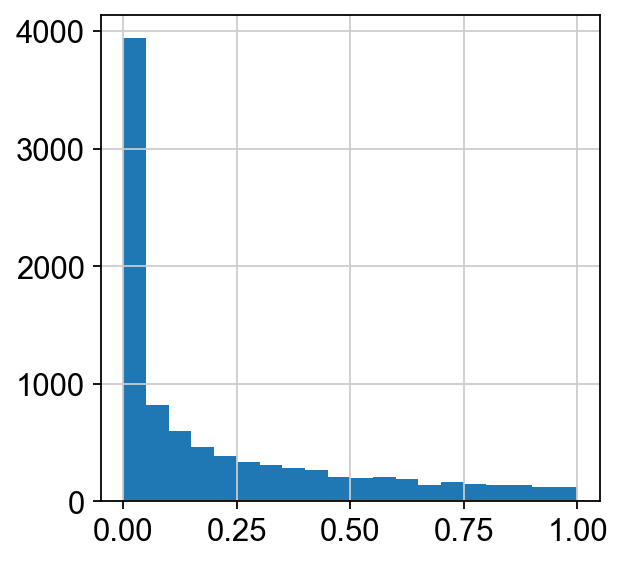

In [12]:
anova_res['PR(>F)'].hist(bins=20)

## PCA

In [13]:
adata_norm_anova = adata_pb_norm[:, adata_pb_norm.var.p_val_adj < 0.05]
df = pd.DataFrame(adata_norm_anova.X, columns=adata_norm_anova.var_names, index=adata_norm_anova.obs_names)
df.head()

AGRN   ANKRD65   TMEM240      NADK      GNB1     GABRD  \
WM.human_759 -0.587605 -0.576557 -0.380610 -0.392677 -0.483306  1.407958   
L5.human_759  1.094584 -1.222160  0.233380  0.448628 -0.063677 -1.209827   
L2.human_759 -1.277674  0.650135 -1.163493  0.107402  0.628297 -1.416184   
L3.human_759  0.755363  1.485988 -0.707767 -0.631591  0.896980  0.611115   
L1.human_759 -0.816885  0.534018 -0.439080 -0.663356 -1.988943  0.109264   

                  TP73      CHD5    GPR153   PLEKHG5  ...     BACE2     RSPH1  \
WM.human_759 -0.575692  0.715740 -1.468521 -1.837898  ...  1.663898 -0.853417   
L5.human_759  1.122904  1.013839 -0.590731  0.684865  ... -0.193066 -0.151746   
L2.human_759 -0.575692 -0.400103 -0.115422 -0.453934  ... -1.020129 -0.139674   
L3.human_759 -0.575692  0.399211  0.570003  1.309722  ... -0.588167  0.970819   
L1.human_759  1.755557 -1.966820  1.725375  0.016130  ... -0.323008 -0.830282   

                NDUFV3      RRP1      PFKL   COL18A1    COL6A2       LSS  \
WM.human_759  1.184517  0.583662 -0.296142  0.451379 -0.369059  0.091970   
L5.human_759  0.630000 -0.158218  1.209057 -0.710637  0.304568 -0.169549   
L2.human_759 -1.302302 -0.311605 -0.122511 -0.080439 -0.827055 -1.230772   
L3.human_759 -0.055759  0.699986  0.081439 -0.594865 -0.448743 -0.094421   
L1.human_759 -1.422980 -1.837171 -1.494951  2.068605  2.137187  1.874758   

                 S100B     PRMT2  
WM.human_759 -0.043002  1.253314  
L5.human_759 -0.537251 -0.525737  
L2.human_759 -0.326476  0.482834  
L3.human_759 -0.521913 -0.859364  
L1.human_759  2.236617  0.875557  

[5 rows x 2836 columns]

In [14]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(adata_pb_norm.X.T)

In [15]:
fig = px.scatter(components, x=0, y=1, hover_name=adata_pb_norm.var_names, color=(adata_pb_norm.var.p_val_adj < 0.05), opacity=0.5)
fig.show('notebook')

# Genes that a significant for different species (t-test)

## Human-specific genes

In [16]:
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.334627  0.749294   0.871771
1  ANKRD65    L1  human  chimp -0.558470  0.596733   0.772328
2  TMEM240    L1  human  chimp  2.100247  0.080450   0.274743
3     NADK    L1  human  chimp -5.641027  0.001330   0.038326
4     GNB1    L1  human  chimp  0.164405  0.874811   0.941712

Subset genes that are significant in human comparisons

In [17]:
# subset signif genes
human_specific = ttest_res[(ttest_res.p_val_adj < 0.05) & (ttest_res.group1 == 'human')].copy()
# add column for direction of change
human_specific['change_dir'] = np.sign(human_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(human_specific.group2)
human_specific = pd.concat([human_specific, onehot_group2], axis=1)

human_specific.tail()

gene layer group1   group2     score    pvalue  p_val_adj change_dir  \
5612   KCNJ4    WM  human  macaque  4.891629  0.001770   0.033748         up   
5656    ETS2    WM  human  macaque  4.604581  0.002471   0.039594         up   
5660    PCP4    WM  human  macaque  5.183448  0.001276   0.028640         up   
5664  NDUFV3    WM  human  macaque  4.351162  0.003350   0.044958         up   
5669     LSS    WM  human  macaque -8.268549  0.000074   0.006954       down   

      chimp  macaque  
5612  False     True  
5656  False     True  
5660  False     True  
5664  False     True  
5669  False     True

### Barplot for number of sign genes

Aggregate comparisons for each layer

In [18]:
dummie_df = (
    human_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'chimp': 'sum', 'macaque': 'sum'})
)

dummie_df['shared'] = dummie_df.chimp * dummie_df.macaque
dummie_df.tail()

change_dir layer     gene  chimp  macaque  shared
1672         up    WM   ZNF304      0        1       0
1673         up    WM   ZNF341      1        0       0
1674         up    WM  ZNF385B      0        1       0
1675         up    WM   ZNF655      0        1       0
1676         up    WM   ZSWIM7      0        1       0

Count number of signif genes for each layer

In [19]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'chimp': 'sum', 'macaque': 'sum'})
)

count_sign

shared  chimp  macaque
change_dir layer                        
down       L1         11     43      127
           L2          9     32      122
           L3          7     26      164
           L4          4     15       87
           L5          0      5       22
           L6          2     10       25
           WM          6     43      135
up         L1          8     41       46
           L2         16     53       74
           L3          9     30      109
           L4         17     50      105
           L5          2     19       35
           L6          5     26       39
           WM         10     33      267

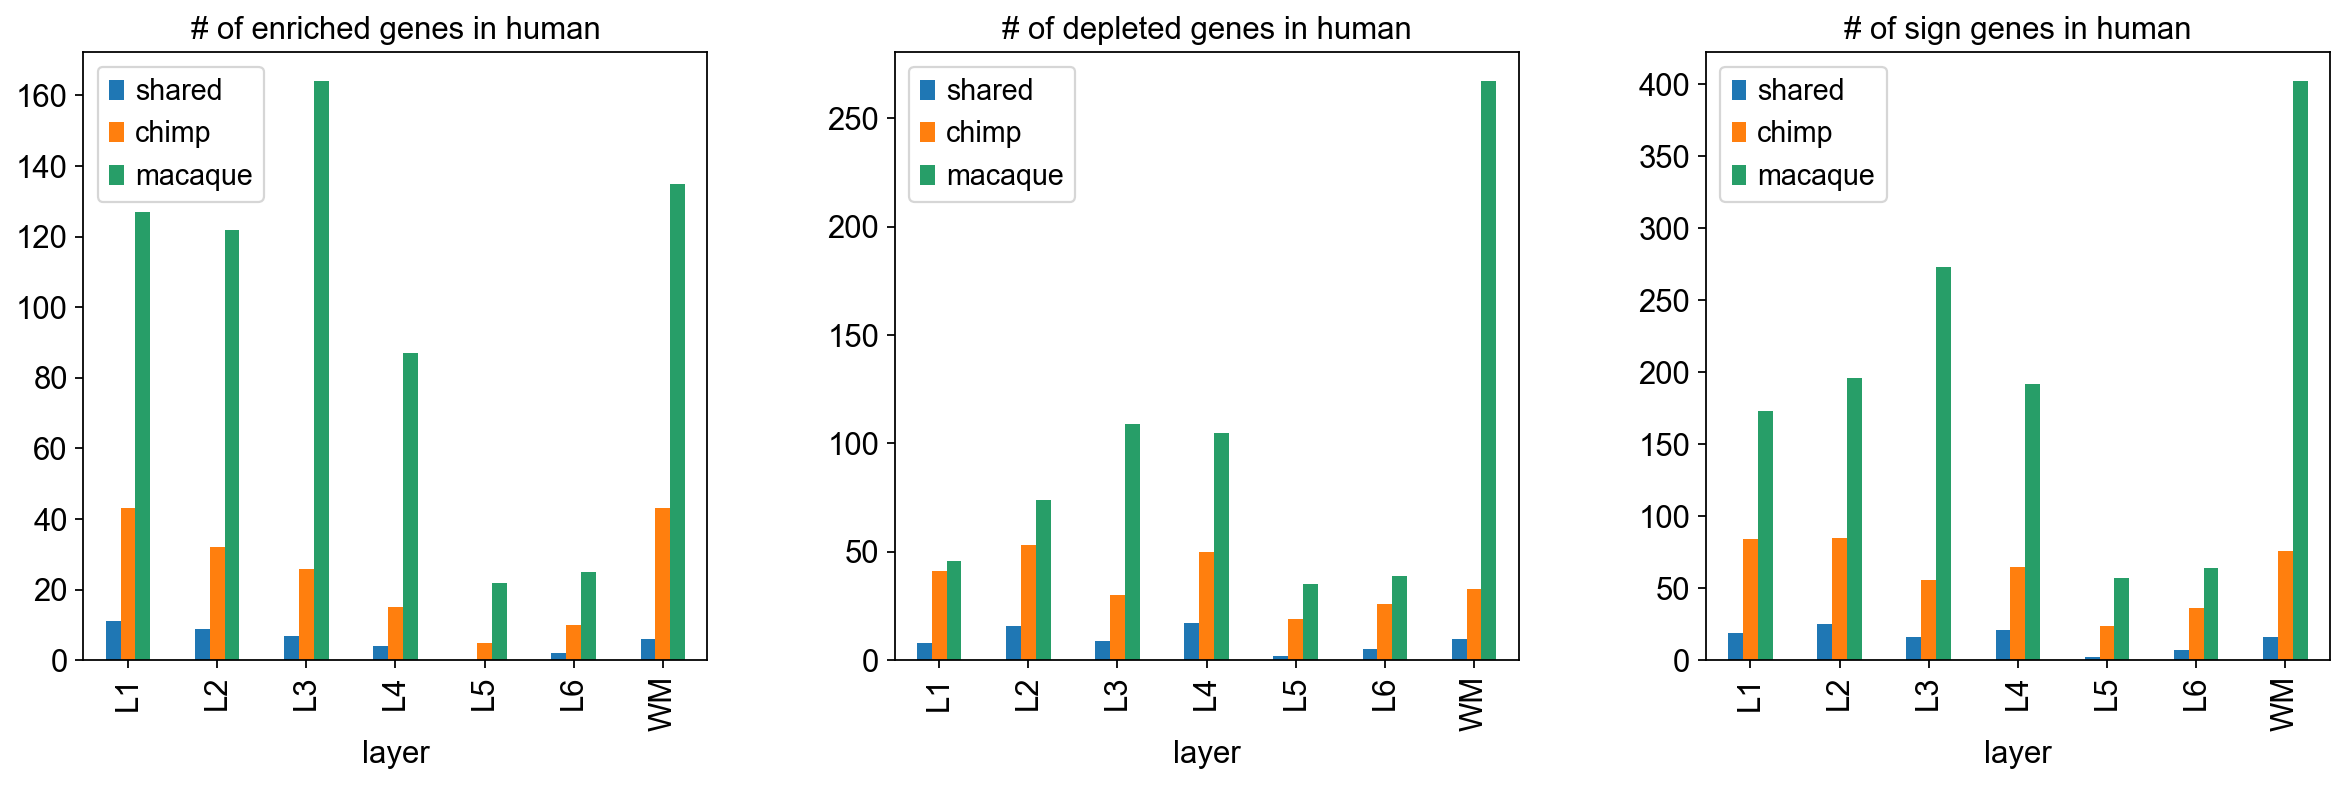

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in human')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in human')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'chimp': 'sum', 'macaque': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in human')
ax[2].grid(False)

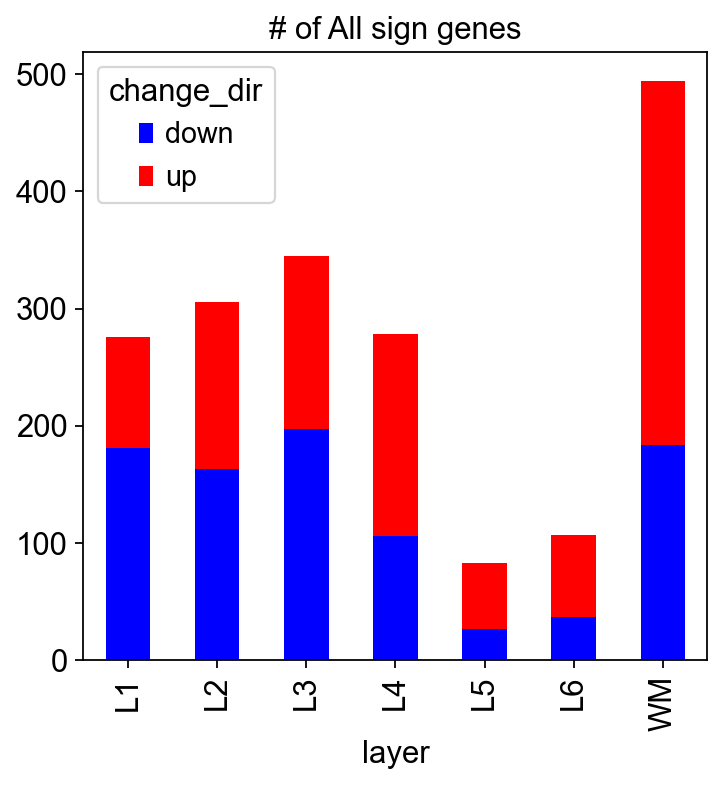

In [21]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3})
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [22]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['chimp', 'macaque']] = composition_sign.loc[:, ['chimp', 'macaque']] - composition_sign.shared.values.reshape(14, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(14, -1)
composition_sign

shared     chimp   macaque
change_dir layer                              
down       L1     0.069182  0.201258  0.729560
           L2     0.062069  0.158621  0.779310
           L3     0.038251  0.103825  0.857923
           L4     0.040816  0.112245  0.846939
           L5     0.000000  0.185185  0.814815
           L6     0.060606  0.242424  0.696970
           WM     0.034884  0.215116  0.750000
up         L1     0.101266  0.417722  0.481013
           L2     0.144144  0.333333  0.522523
           L3     0.069231  0.161538  0.769231
           L4     0.123188  0.239130  0.637681
           L5     0.038462  0.326923  0.634615
           L6     0.083333  0.350000  0.566667
           WM     0.034483  0.079310  0.886207

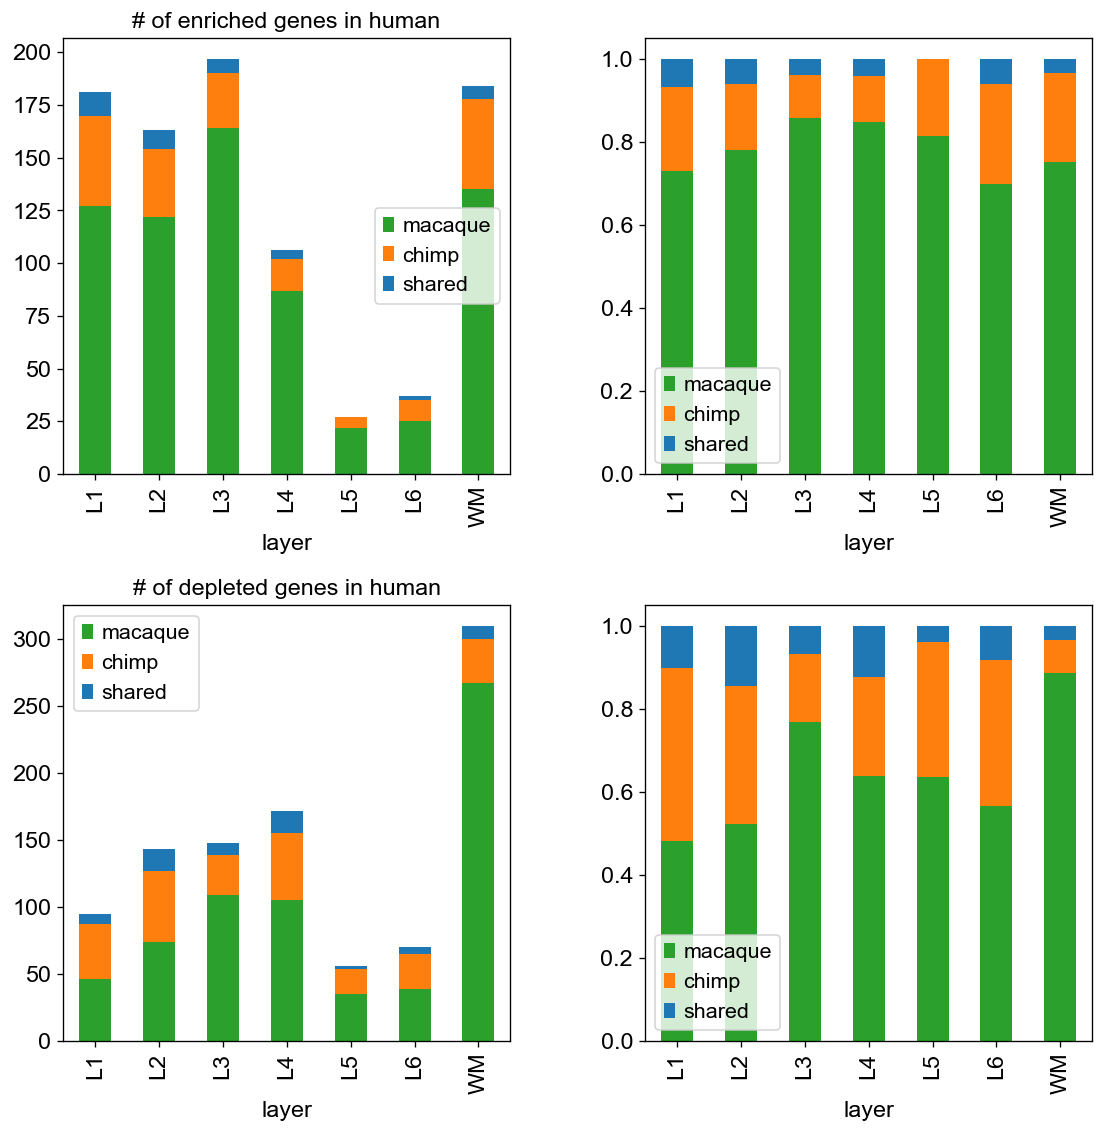

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3}, dpi=60)
order = ['macaque', 'chimp', 'shared']
color = {'macaque': 'tab:green', 'chimp': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in human')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in human')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

### Jaccard heatmap for layers

In [24]:
dummie_layer = (
    dummie_df
    .layer
    .str
    .get_dummies()
)

dummie_layer['gene'] = dummie_df['gene']

dummie_layer = (
    dummie_layer
    .groupby('gene')
    .sum()
    .replace({2: 1})
)
dummie_layer.head()

L1  L2  L3  L4  L5  L6  WM
gene                             
AARS1   0   0   1   0   0   0   0
AATK    0   1   0   0   0   0   1
ABAT    0   0   0   0   0   1   0
ABCA2   0   0   0   0   0   0   1
ABCA3   0   1   0   0   0   0   0

In [25]:
dummie_layer.sum()

L1    238
L2    256
L3    313
L4    236
L5     79
L6     93
WM    461
dtype: int64

In [26]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer.T), columns=dummie_layer.columns, index=dummie_layer.columns)
pairwise_jaccard

L1        L2        L3        L4        L5        L6        WM
L1  1.000000  0.042194  0.059615  0.062780  0.035948  0.044164  0.041729
L2  0.042194  1.000000  0.079696  0.040169  0.053459  0.051205  0.086364
L3  0.059615  0.079696  1.000000  0.066019  0.053763  0.043702  0.107296
L4  0.062780  0.040169  0.066019  1.000000  0.026059  0.047771  0.075617
L5  0.035948  0.053459  0.053763  0.026059  1.000000  0.023810  0.018868
L6  0.044164  0.051205  0.043702  0.047771  0.023810  1.000000  0.022140
WM  0.041729  0.086364  0.107296  0.075617  0.018868  0.022140  1.000000

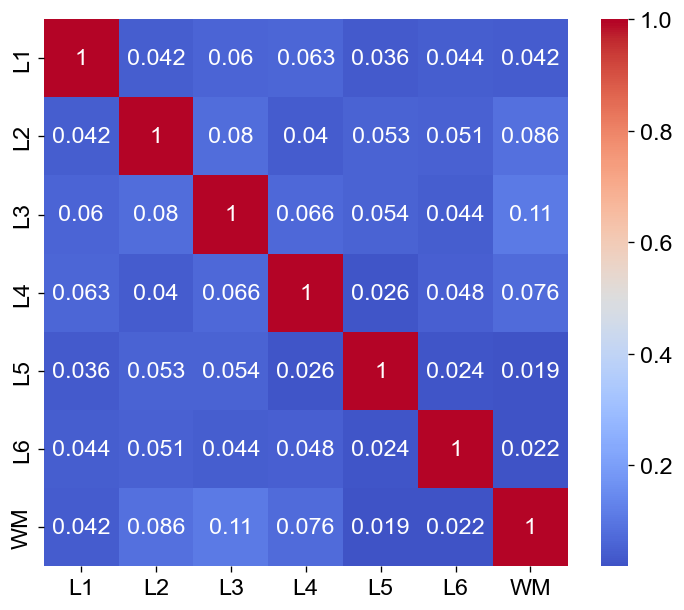

In [27]:
plt.figure(figsize=(7, 6), dpi=60)
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)

### ttest human vs monkeys significant genes

In [28]:
ttest_monkeys_res['group1'] = 'human'
ttest_monkeys_res['group2'] = 'monkeys'

In [29]:
# subset signif genes
monkey_sign = ttest_monkeys_res[ttest_monkeys_res.p_val_adj < 0.05].copy()
# add column for direction of change
monkey_sign['change_dir'] = np.sign(monkey_sign.score).map({1: 'up', -1: 'down'})
monkey_sign.head()

gene layer group1   group2     score    pvalue  p_val_adj change_dir
84    PPCS    L1  human  monkeys -7.730305  0.000016   0.004816       down
147  KCND3    L1  human  monkeys  6.894346  0.000042   0.007046         up
321  EPCAM    L1  human  monkeys -4.773475  0.000753   0.038139       down
406   RPRM    L1  human  monkeys -6.937203  0.000040   0.007046       down
412    GCA    L1  human  monkeys -5.044965  0.000503   0.031697       down

In [30]:
count_sign = (
    monkey_sign
    .groupby(['change_dir', 'layer'])
    .agg({'gene': 'count'})
)
count_sign

gene
change_dir layer      
down       L1       42
           L2       38
           L3       46
           L4       13
           L5        9
           L6       14
           WM       24
up         L1       19
           L2       40
           L3       51
           L4       49
           L5       26
           L6       31
           WM       21

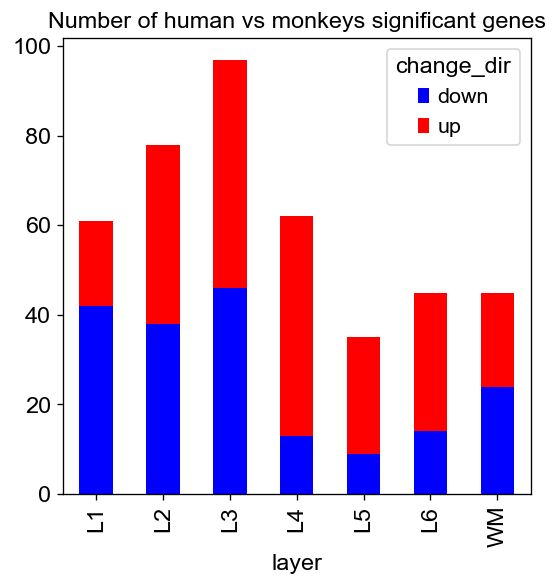

In [31]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3}, dpi=60)
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('Number of human vs monkeys significant genes')
ax.grid(False)

### ttest jaccard

In [32]:
monkey_dummie_layer = (
    monkey_sign
    .set_index('gene')
    .layer
    .str
    .get_dummies()
    .groupby('gene')
    .agg({layer: 'sum' for layer in layers})
)
monkey_dummie_layer.columns = monkey_dummie_layer.columns + '_monkey'
monkey_dummie_layer

L1_monkey  L2_monkey  L3_monkey  L4_monkey  L5_monkey  L6_monkey  \
gene                                                                       
AATK            0          1          0          0          0          0   
ABT1            1          0          0          0          0          0   
ACAP1           0          0          0          0          0          0   
ACBD6           0          0          0          0          0          1   
ACSL4           0          1          1          0          0          0   
...           ...        ...        ...        ...        ...        ...   
ZMYND8          0          0          0          0          0          1   
ZNF254          0          1          0          0          0          0   
ZNF579          1          0          0          0          0          0   
ZWILCH          1          0          1          0          0          0   
ZYX             0          1          0          0          0          0   

        WM_monkey  
gene               
AATK            0  
ABT1            0  
ACAP1           1  
ACBD6           0  
ACSL4           0  
...           ...  
ZMYND8          0  
ZNF254          0  
ZNF579          0  
ZWILCH          0  
ZYX             0  

[375 rows x 7 columns]

In [33]:
dummie_layer_concat = pd.concat([dummie_layer, monkey_dummie_layer], axis=1).fillna(0)
dummie_layer_concat

L1   L2   L3   L4   L5   L6   WM  L1_monkey  L2_monkey  L3_monkey  \
gene                                                                         
AARS1   0.0  0.0  1.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0   
AATK    0.0  1.0  0.0  0.0  0.0  0.0  1.0        0.0        1.0        0.0   
ABAT    0.0  0.0  0.0  0.0  0.0  1.0  0.0        0.0        0.0        0.0   
ABCA2   0.0  0.0  0.0  0.0  0.0  0.0  1.0        0.0        0.0        0.0   
ABCA3   0.0  1.0  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0   
...     ...  ...  ...  ...  ...  ...  ...        ...        ...        ...   
VSTM2A  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0        0.0        1.0   
WBP4    0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0   
ZEB2    0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0   
ZMYND8  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0   
ZWILCH  0.0  0.0  0.0  0.0  0.0  0.0  0.0        1.0        0.0        1.0   

        L4_monkey  L5_monkey  L6_monkey  WM_monkey  
gene                                                
AARS1         0.0        0.0        0.0        0.0  
AATK          0.0        0.0        0.0        0.0  
ABAT          0.0        0.0        0.0        0.0  
ABCA2         0.0        0.0        0.0        0.0  
ABCA3         0.0        0.0        0.0        0.0  
...           ...        ...        ...        ...  
VSTM2A        0.0        0.0        0.0        0.0  
WBP4          1.0        0.0        0.0        0.0  
ZEB2          0.0        0.0        1.0        0.0  
ZMYND8        0.0        0.0        1.0        0.0  
ZWILCH        0.0        0.0        0.0        0.0  

[1321 rows x 14 columns]

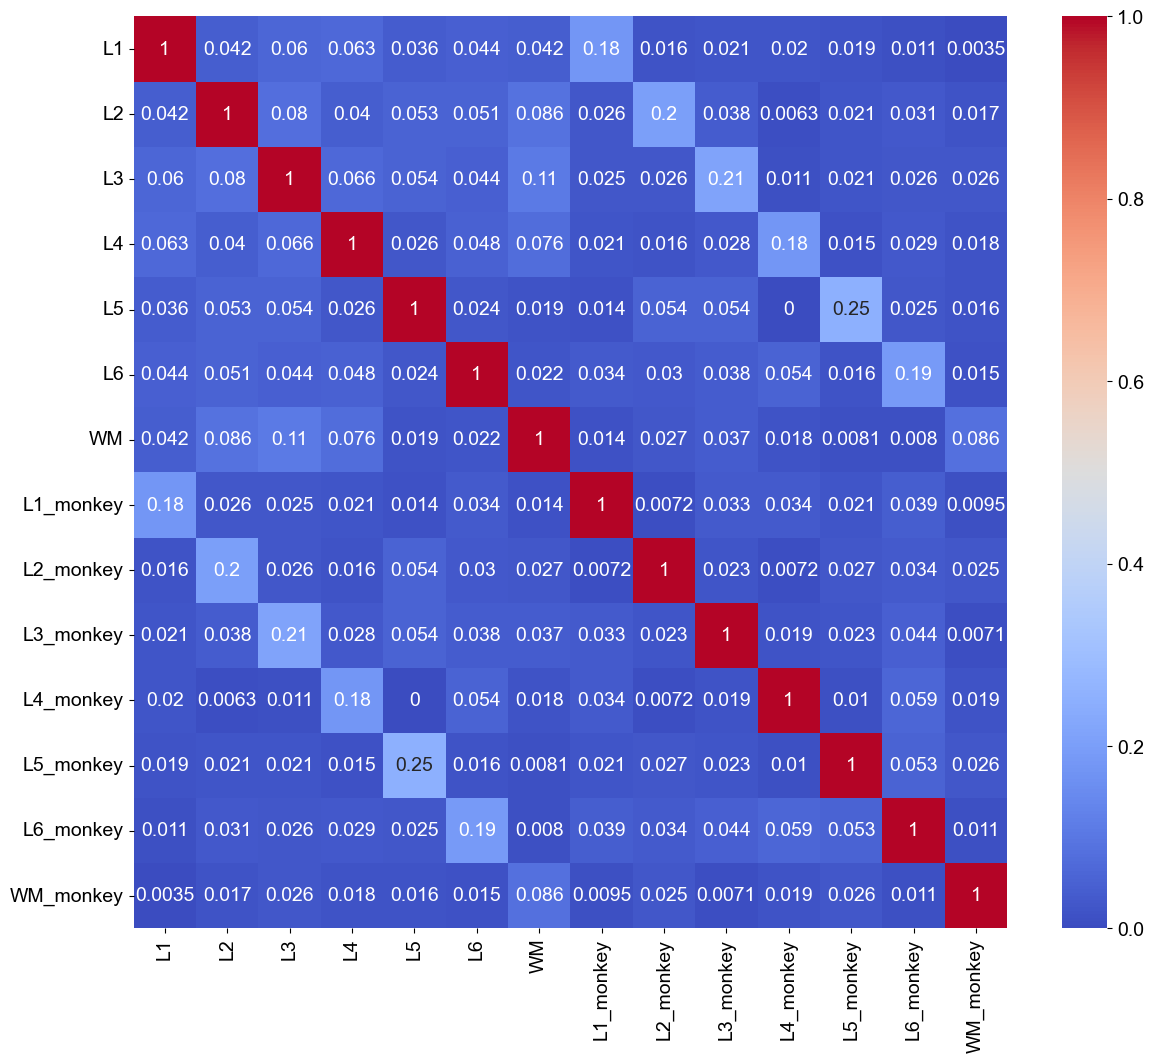

In [34]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer_concat.T), columns=dummie_layer_concat.columns, index=dummie_layer_concat.columns)
pairwise_jaccard

plt.figure(figsize=(14, 12), dpi=50)
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)

## Chimpanzee-specific genes

In [35]:
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.334627  0.749294   0.871771
1  ANKRD65    L1  human  chimp -0.558470  0.596733   0.772328
2  TMEM240    L1  human  chimp  2.100247  0.080450   0.274743
3     NADK    L1  human  chimp -5.641027  0.001330   0.038326
4     GNB1    L1  human  chimp  0.164405  0.874811   0.941712

Subset genes that are significant in chimp comparisons

In [36]:
# subset signif genes
chimp_specific = ttest_res[(ttest_res.p_val_adj < 0.05) & ((ttest_res.group1 == 'chimp') | (ttest_res.group2 == 'chimp'))].copy()
chimp_specific.loc[chimp_specific.group1 == 'human', ['group1', 'group2']] = ['chimp', 'human']
chimp_specific.loc[chimp_specific.group2 == 'human', 'score'] *= -1
# add column for direction of change
chimp_specific['change_dir'] = np.sign(chimp_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(chimp_specific.group2)
chimp_specific = pd.concat([chimp_specific, onehot_group2], axis=1)

chimp_specific.tail()

gene layer group1   group2      score    pvalue  p_val_adj change_dir  \
8402  ZNF304    WM  chimp  macaque  15.818723  0.000004   0.002355         up   
8429     DDT    WM  chimp  macaque  -5.451075  0.001586   0.032108       down   
8447  TRIOBP    WM  chimp  macaque   9.057982  0.000102   0.008382         up   
8481  PAXBP1    WM  chimp  macaque  -4.634746  0.003560   0.045860       down   
8505     LSS    WM  chimp  macaque  -7.631691  0.000264   0.013946       down   

      human  macaque  
8402  False     True  
8429  False     True  
8447  False     True  
8481  False     True  
8505  False     True

### Barplot for number of sign genes

Aggregate comparisons for each layer

In [37]:
dummie_df = (
    chimp_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'human': 'sum', 'macaque': 'sum'})
)

dummie_df['shared'] = dummie_df.human * dummie_df.macaque
dummie_df.tail()

change_dir layer     gene  human  macaque  shared
1176         up    WM   ZNF333      1        1       1
1177         up    WM   ZNF462      0        1       0
1178         up    WM   ZNF655      0        1       0
1179         up    WM  ZSCAN26      1        0       0
1180         up    WM   ZSWIM7      0        1       0

Count number of signif genes for each layer

In [38]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'human': 'sum', 'macaque': 'sum'})
)

count_sign

shared  human  macaque
change_dir layer                        
down       L1          7     41       75
           L2         13     53       99
           L3          5     30       79
           L4          5     50       51
           L5          1     19       16
           L6          2     26       12
           WM          2     33       66
up         L1          4     43       62
           L2          4     32       44
           L3          1     26       64
           L4          2     15       42
           L5          0      5       17
           L6          0     10       15
           WM          5     43      164

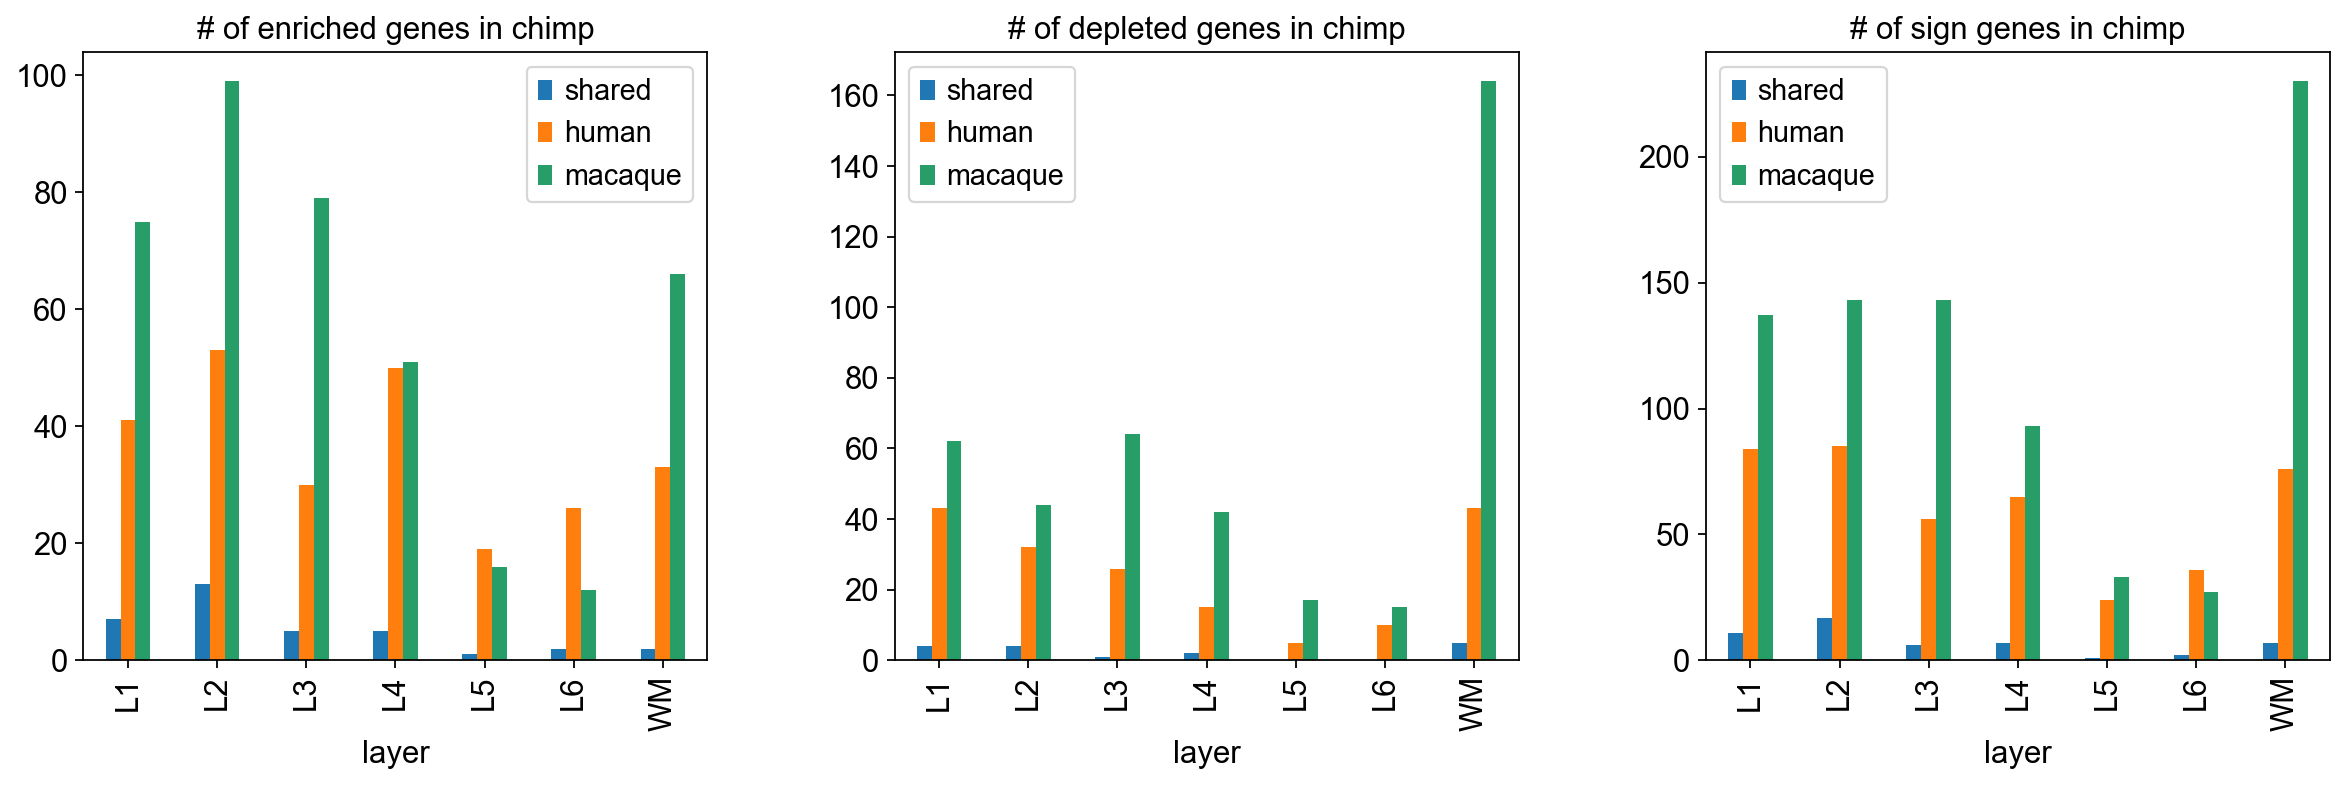

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in chimp')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in chimp')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'human': 'sum', 'macaque': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in chimp')
ax[2].grid(False)

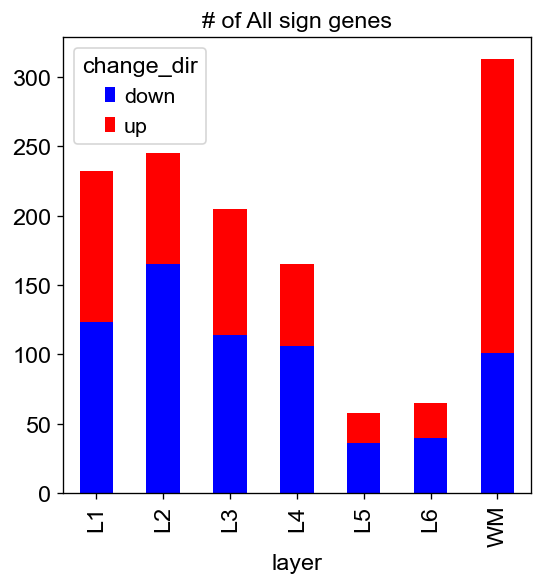

In [40]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3}, dpi=60)
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [41]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['human', 'macaque']] = composition_sign.loc[:, ['human', 'macaque']] - composition_sign.shared.values.reshape(14, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(14, -1)
composition_sign

shared     human   macaque
change_dir layer                              
down       L1     0.064220  0.311927  0.623853
           L2     0.093525  0.287770  0.618705
           L3     0.048077  0.240385  0.711538
           L4     0.052083  0.468750  0.479167
           L5     0.029412  0.529412  0.441176
           L6     0.055556  0.666667  0.277778
           WM     0.020619  0.319588  0.659794
up         L1     0.039604  0.386139  0.574257
           L2     0.055556  0.388889  0.555556
           L3     0.011236  0.280899  0.707865
           L4     0.036364  0.236364  0.727273
           L5     0.000000  0.227273  0.772727
           L6     0.000000  0.400000  0.600000
           WM     0.024752  0.188119  0.787129

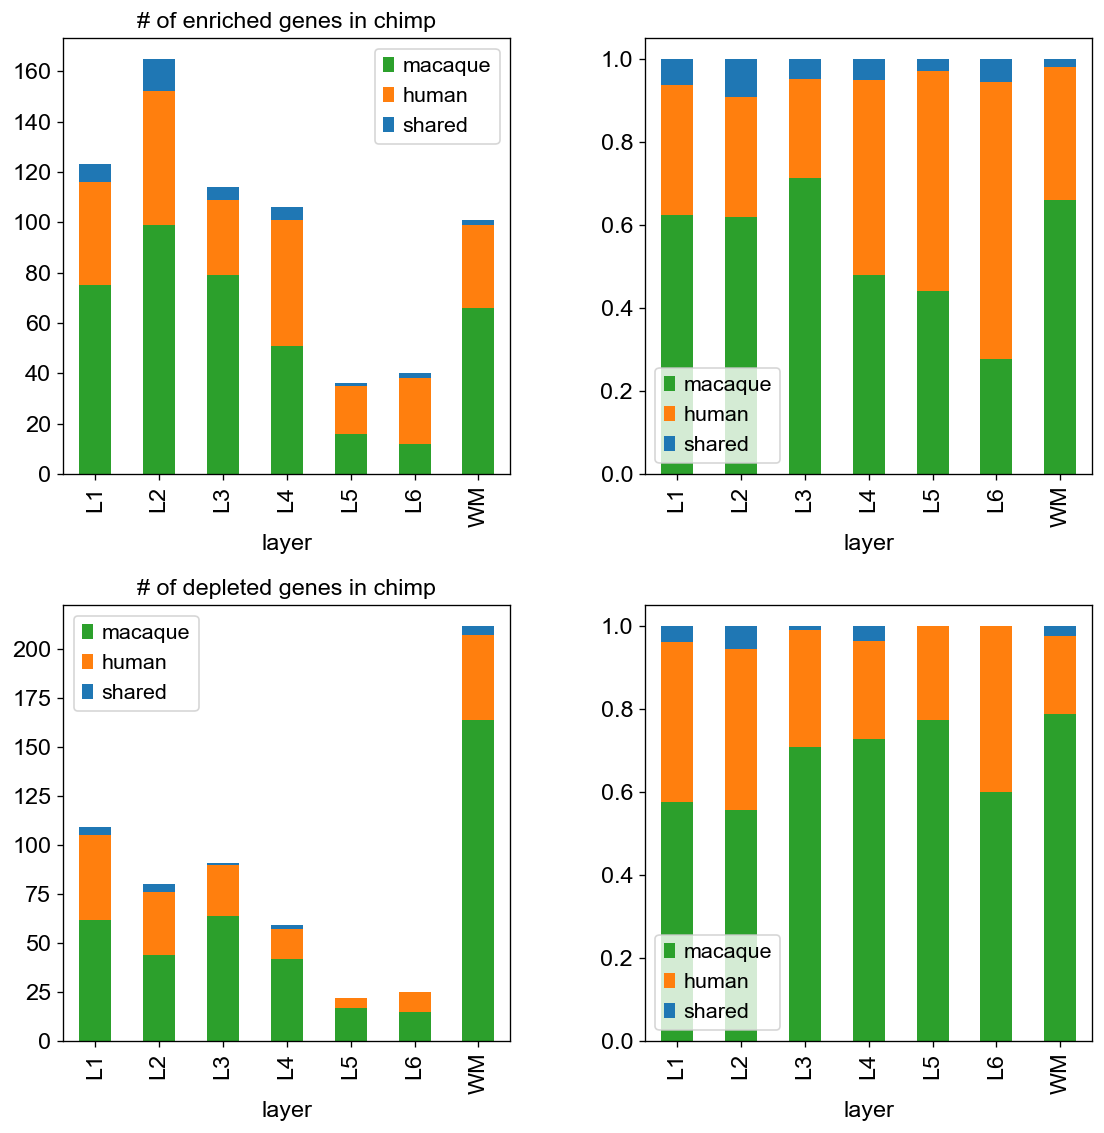

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3}, dpi=60)
order = ['macaque', 'human', 'shared']
color = {'macaque': 'tab:green', 'human': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in chimp')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in chimp')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

### Jaccard heatmap for layers

In [43]:
dummie_layer = (
    dummie_df
    .layer
    .str
    .get_dummies()
)

dummie_layer['gene'] = dummie_df['gene']

dummie_layer = (
    dummie_layer
    .groupby('gene')
    .sum()
    .replace({2: 1})
)
dummie_layer.head()

L1  L2  L3  L4  L5  L6  WM
gene                             
A1BG    0   0   1   0   0   0   0
AATK    0   1   0   0   0   0   0
ABAT    0   0   0   0   1   1   0
ABCA2   1   0   0   0   0   0   1
ABCD4   0   0   0   0   0   0   1

In [44]:
dummie_layer.sum()

L1    210
L2    210
L3    192
L4    151
L5     56
L6     61
WM    298
dtype: int64

In [45]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer.T), columns=dummie_layer.columns, index=dummie_layer.columns)
pairwise_jaccard

L1        L2        L3        L4        L5        L6        WM
L1  1.000000  0.039604  0.033419  0.037356  0.035019  0.030418  0.036735
L2  0.039604  1.000000  0.049608  0.037356  0.051383  0.022642  0.045267
L3  0.033419  0.049608  1.000000  0.045732  0.024793  0.032653  0.067538
L4  0.037356  0.037356  0.045732  1.000000  0.035000  0.039216  0.041763
L5  0.035019  0.051383  0.024793  0.035000  1.000000  0.054054  0.020173
L6  0.030418  0.022642  0.032653  0.039216  0.054054  1.000000  0.016997
WM  0.036735  0.045267  0.067538  0.041763  0.020173  0.016997  1.000000

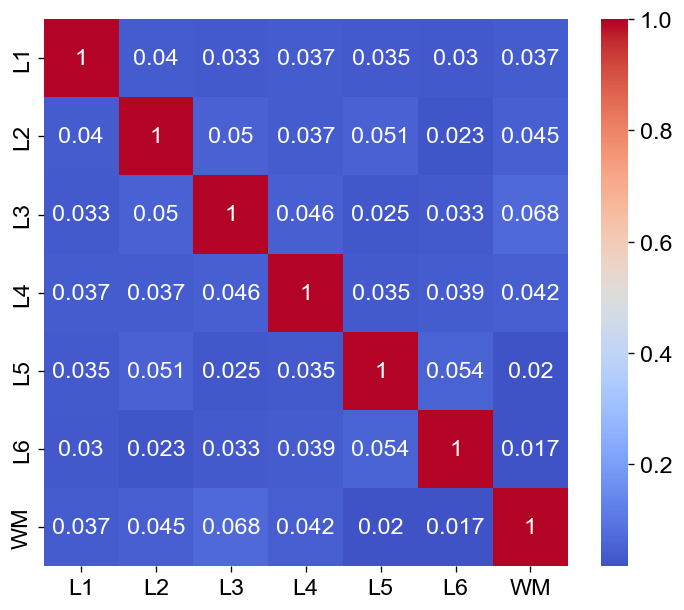

In [46]:
plt.figure(figsize=(7, 6), dpi=60)
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)

## Macaque-specific genes

In [47]:
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.334627  0.749294   0.871771
1  ANKRD65    L1  human  chimp -0.558470  0.596733   0.772328
2  TMEM240    L1  human  chimp  2.100247  0.080450   0.274743
3     NADK    L1  human  chimp -5.641027  0.001330   0.038326
4     GNB1    L1  human  chimp  0.164405  0.874811   0.941712

Subset genes that are significant in macaque comparisons

In [48]:
# subset signif genes
macaque_specific = ttest_res[(ttest_res.p_val_adj < 0.05) &  (ttest_res.group2 == 'macaque')].copy()
macaque_specific.columns = ['gene', 'layer', 'group2', 'group1', 'score', 'pvalue', 'p_val_adj']
macaque_specific.score = -1 * macaque_specific.score
# add column for direction of change
macaque_specific['change_dir'] = np.sign(macaque_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(macaque_specific.group2)
macaque_specific = pd.concat([macaque_specific, onehot_group2], axis=1)

macaque_specific.tail()

gene layer group2   group1      score    pvalue  p_val_adj change_dir  \
8402  ZNF304    WM  chimp  macaque -15.818723  0.000004   0.002355       down   
8429     DDT    WM  chimp  macaque   5.451075  0.001586   0.032108         up   
8447  TRIOBP    WM  chimp  macaque  -9.057982  0.000102   0.008382       down   
8481  PAXBP1    WM  chimp  macaque   4.634746  0.003560   0.045860         up   
8505     LSS    WM  chimp  macaque   7.631691  0.000264   0.013946         up   

      chimp  human  
8402   True  False  
8429   True  False  
8447   True  False  
8481   True  False  
8505   True  False

### Barplot for number of sign genes

Aggregate comparisons for each layer

In [49]:
dummie_df = (
    macaque_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'human': 'sum', 'chimp': 'sum'})
)

dummie_df['shared'] = dummie_df.human * dummie_df.chimp
dummie_df.tail()

change_dir layer    gene  human  chimp  shared
1920         up    WM  UNC45A      1      0       0
1921         up    WM   VASH1      1      0       0
1922         up    WM   WDFY3      1      1       1
1923         up    WM     WLS      0      1       0
1924         up    WM  ZFAND3      1      0       0

Count number of signif genes for each layer

In [50]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'human': 'sum', 'chimp': 'sum'})
)

count_sign

shared  human  chimp
change_dir layer                      
down       L1          9     46     62
           L2          9     74     44
           L3         19    109     64
           L4         19    105     42
           L5          1     35     17
           L6          4     39     15
           WM         58    267    164
up         L1         17    127     75
           L2         25    122     99
           L3         29    164     79
           L4         15     87     51
           L5          2     22     16
           L6          2     25     12
           WM         29    135     66

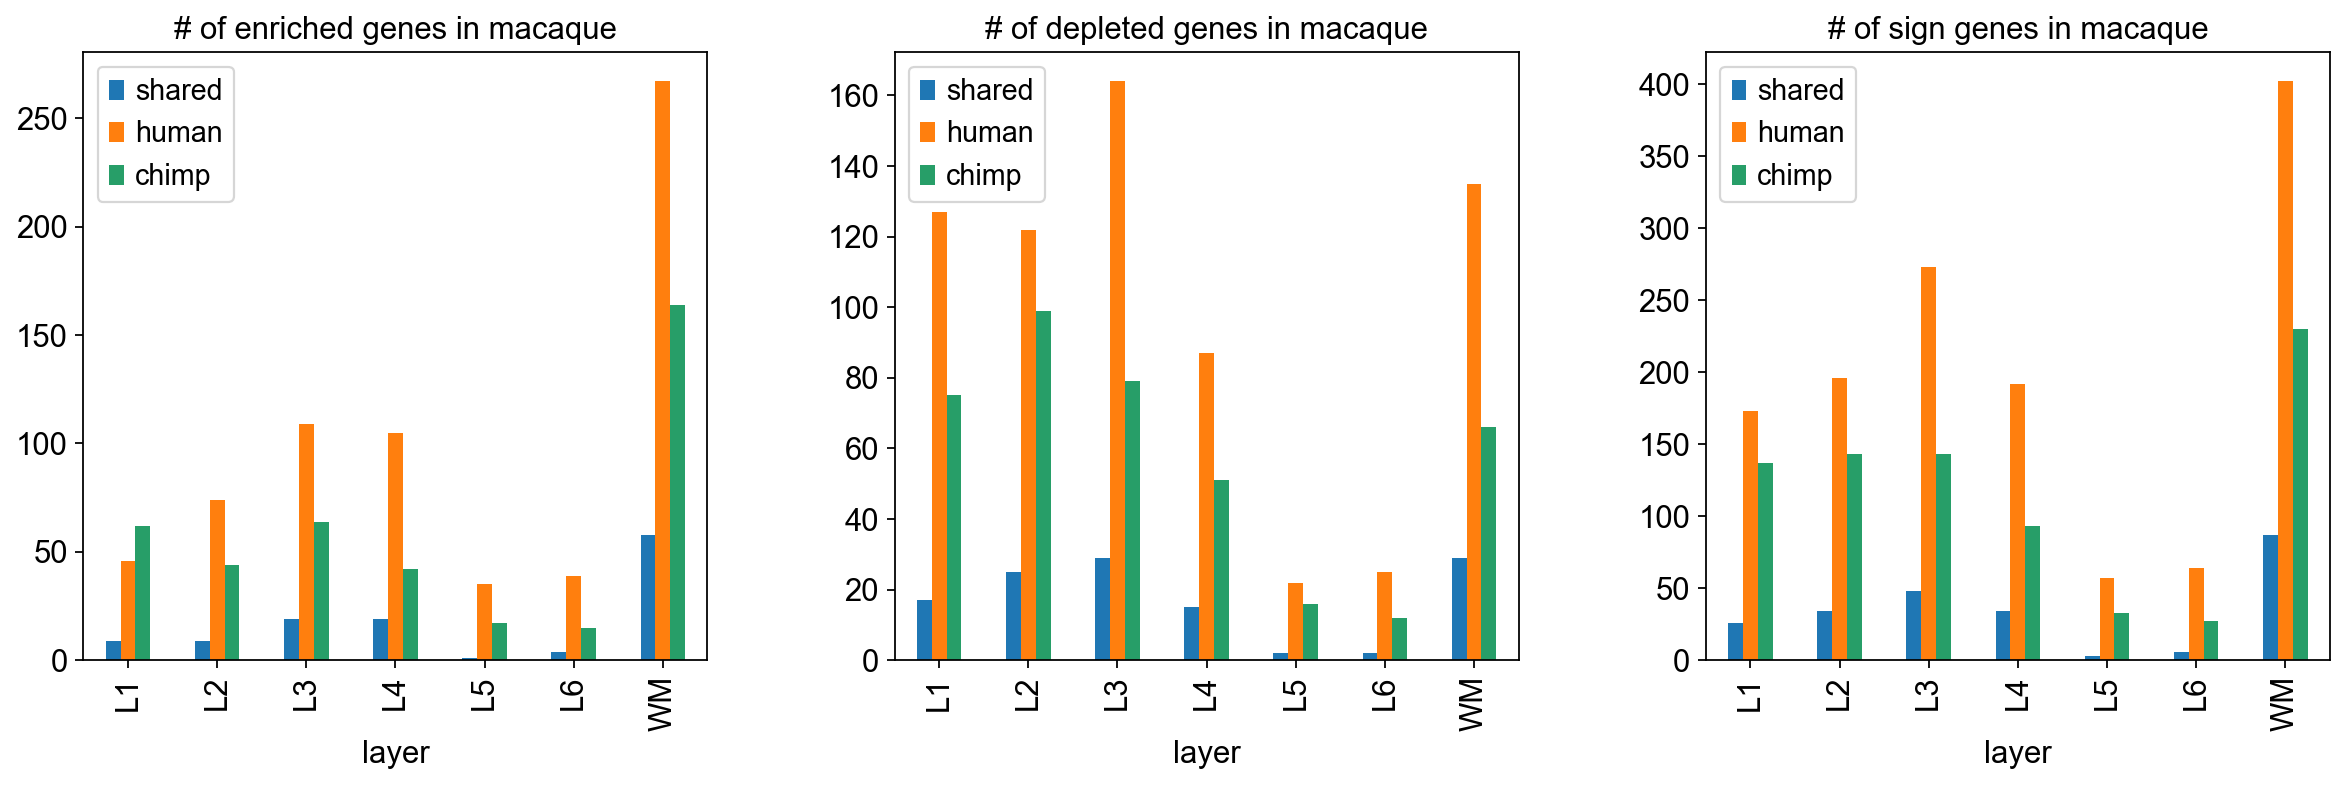

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in macaque')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in macaque')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'human': 'sum', 'chimp': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in macaque')
ax[2].grid(False)

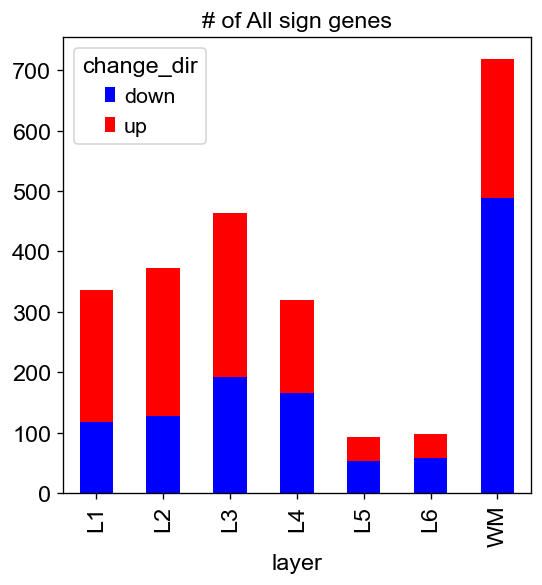

In [52]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3}, dpi=60)
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [53]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['human', 'chimp']] = composition_sign.loc[:, ['human', 'chimp']] - composition_sign.shared.values.reshape(14, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(14, -1)
composition_sign

shared     human     chimp
change_dir layer                              
down       L1     0.090909  0.373737  0.535354
           L2     0.082569  0.596330  0.321101
           L3     0.123377  0.584416  0.292208
           L4     0.148438  0.671875  0.179688
           L5     0.019608  0.666667  0.313725
           L6     0.080000  0.700000  0.220000
           WM     0.155496  0.560322  0.284182
up         L1     0.091892  0.594595  0.313514
           L2     0.127551  0.494898  0.377551
           L3     0.135514  0.630841  0.233645
           L4     0.121951  0.585366  0.292683
           L5     0.055556  0.555556  0.388889
           L6     0.057143  0.657143  0.285714
           WM     0.168605  0.616279  0.215116

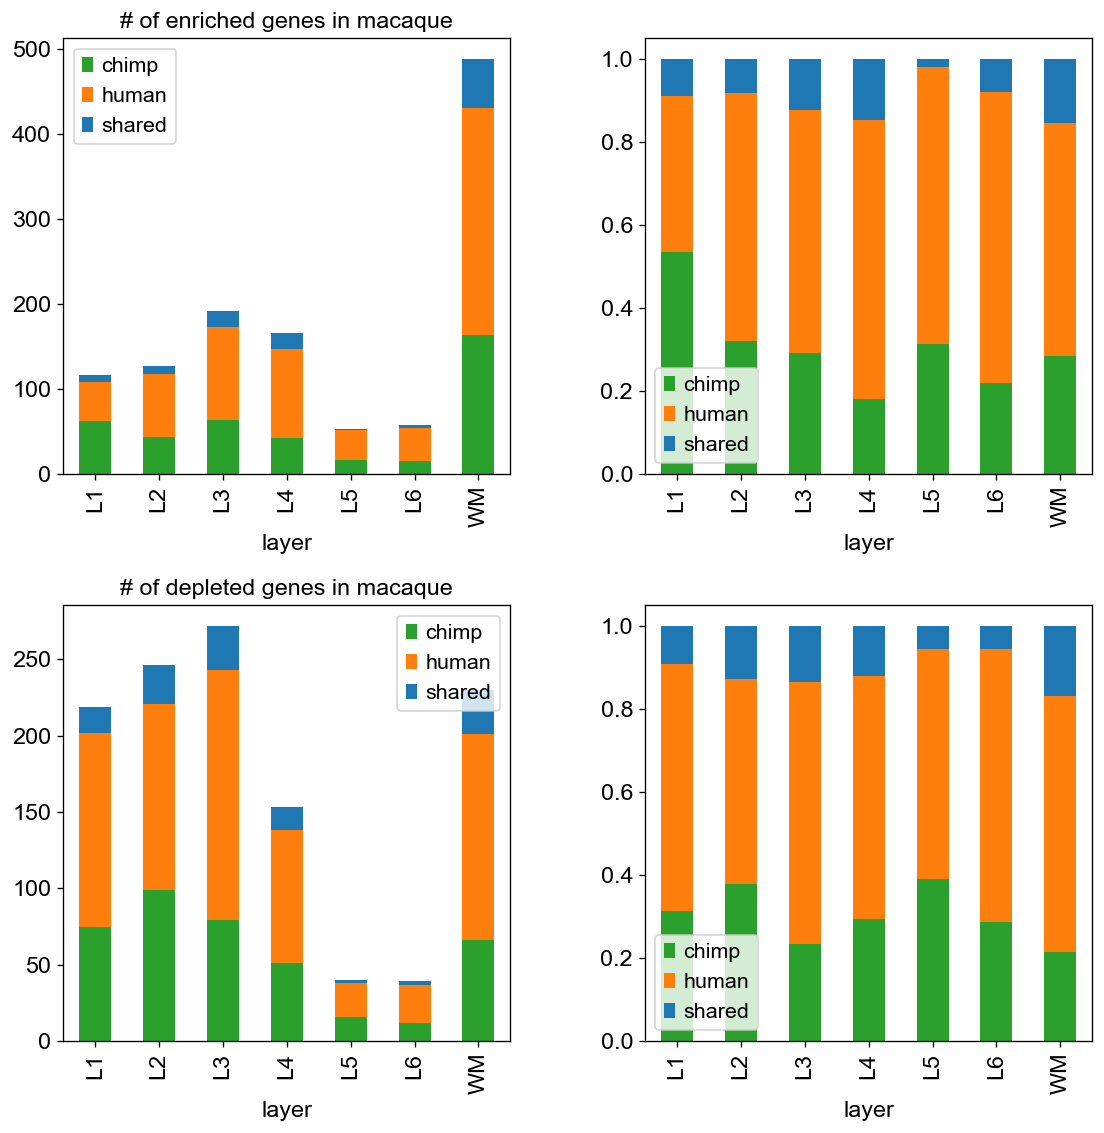

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3}, dpi=60)
order = ['chimp', 'human', 'shared']
color = {'chimp': 'tab:green', 'human': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in macaque')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in macaque')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

### Jaccard heatmap for layers

In [55]:
dummie_layer = (
    dummie_df
    .layer
    .str
    .get_dummies()
)

dummie_layer['gene'] = dummie_df['gene']

dummie_layer = (
    dummie_layer
    .groupby('gene')
    .sum()
    .replace({2: 1})
)
dummie_layer.head()

L1  L2  L3  L4  L5  L6  WM
gene                             
A1BG    0   0   1   0   0   0   0
AARS1   0   0   1   0   0   0   0
AATK    0   0   0   0   0   0   1
ABAT    0   0   0   0   1   1   0
ABCA2   1   0   0   0   0   0   1

In [56]:
dummie_layer.sum()

L1    284
L2    305
L3    368
L4    251
L5     87
L6     85
WM    545
dtype: int64

In [57]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer.T), columns=dummie_layer.columns, index=dummie_layer.columns)
pairwise_jaccard

L1        L2        L3        L4        L5        L6        WM
L1  1.000000  0.038801  0.065359  0.070000  0.036313  0.036517  0.052030
L2  0.038801  1.000000  0.094309  0.043152  0.039788  0.045576  0.093951
L3  0.065359  0.094309  1.000000  0.076522  0.055684  0.041379  0.110706
L4  0.070000  0.043152  0.076522  1.000000  0.027356  0.050000  0.075676
L5  0.036313  0.039788  0.055684  0.027356  1.000000  0.036145  0.030995
L6  0.036517  0.045576  0.041379  0.050000  0.036145  1.000000  0.014493
WM  0.052030  0.093951  0.110706  0.075676  0.030995  0.014493  1.000000

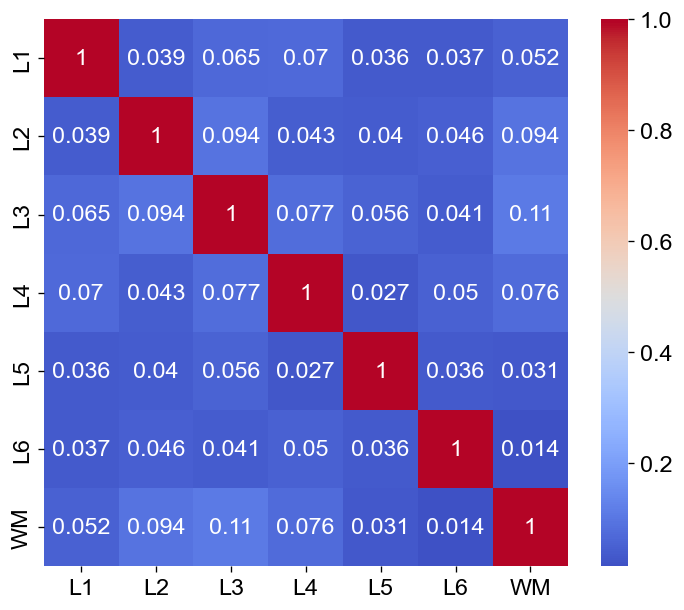

In [58]:
plt.figure(figsize=(7, 6), dpi=60)
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)